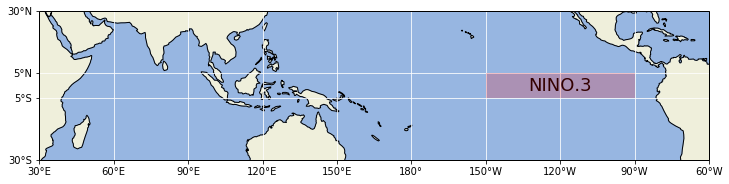

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

fig = plt.figure(figsize=(12, 5))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.coastlines()
ax.set_extent([30, 300, -30, 30], ccrs.PlateCarree())

xticks = [30, 60, 90, 120, 150, 180, 210, 240, 270, 300]
yticks = [-30, -5, 5, 30]
ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.gridlines(xlocs=xticks, ylocs=yticks, color='white')

ax.add_patch(pat.Rectangle(xy = [210, -5], width=60, height=10, facecolor='red',
                           alpha=0.2, transform=ccrs.PlateCarree(), zorder=10))

plt.text(240, 0, 'NINO.3', horizontalalignment='center', verticalalignment='center',
         transform=ccrs.Geodetic(), size=18)

plt.show()


In [35]:
import netCDF4 as nc4

In [36]:
nc = nc4.Dataset('HadISST1_SST_1961-1990.nc')

In [43]:
import numpy as np
sst_nino3 = np.zeros(12 * 30)
for i in range(12*30):
    sst_nino3[i] = nc.variables['sst'][i, 85:90, 30:90].mean()

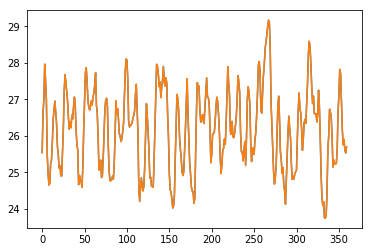

In [45]:
plt.plot(sst_nino3)
plt.show()

In [46]:
sst_nino3.mean()

26.182412126329211

In [47]:
sst_nino3.std()

1.0829993932473387

In [49]:
from datetime import date
dates = np.array([date(y, m, 15) for y in range(1961, 1991) for m in range(1, 13)])

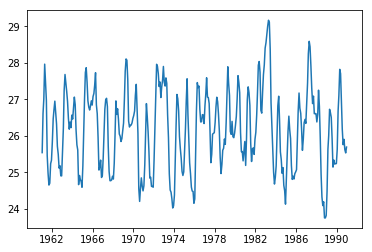

In [70]:
import matplotlib.dates as mdates

plt.plot(dates, sst_nino3)

plt.show()

In [88]:
ncc = nc4.Dataset('HadISST1_SST_1961-1990_clim.nc')
sst_clim = ncc.variables['sst'][10,:,:]

In [96]:
sst_elnino = nc.variables['sst'][np.where(dates==date(1982,11,15))[0][0],:,:]
lon = nc.variables['lon'][:]
lat = nc.variables['lat'][:]

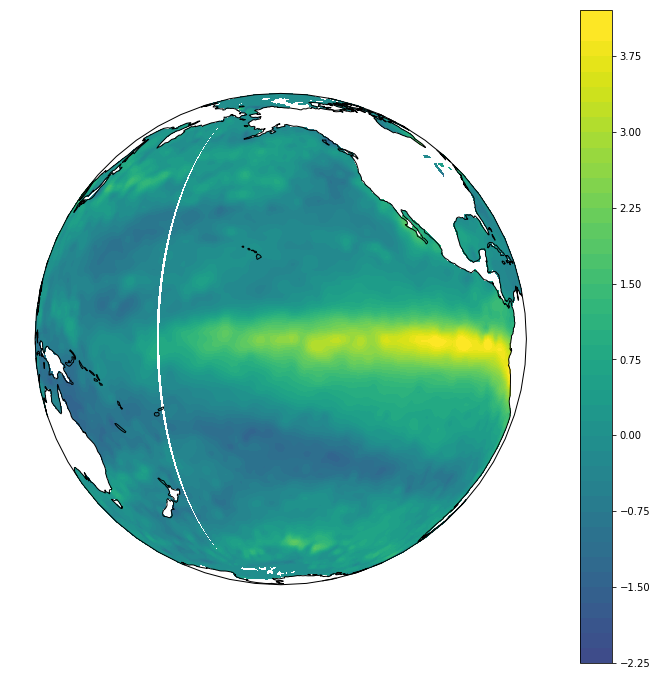

In [100]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=210))

plt.contourf(lon, lat, sst_elnino-sst_clim, 60, transform=ccrs.PlateCarree(), vmin = -4, vmax = 4)
plt.colorbar()

ax.coastlines()

plt.show()